In [2]:
#Dependancies
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sb
import matplotlib.pyplot as plt
from config import college_scorecard_api_key

In [ ]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state_fips,school.zip,location.lat,location.lon,{year}.aid.loan_principal'
csc_2017_response = requests.get(csc_2017_query_url).json()
page_num = csc_2017_response['metadata']['page']


for page in range(0, 10):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 100}).json()
    csc_json_data = csc_2017_response['results']
    #print(str(csc_json_data))   


In [ ]:
data_frame = pd.DataFrame(csc_json_data)
data_frame

In [ ]:
fips_path = "Resources/State FIPS Codes.csv"
fips_states_df = pd.read_csv(fips_path)
fips_codes = fips_states_df['State Code'].tolist()

fips_states_df.head()

### Henock's Code - Start

### Henock's Code - End

----------------------------------------------

### JJ's Code - Start

In [5]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state,school.zip,location.lat,location.lon,{year}.aid.loan_principal'
csc_2017_response = requests.get(csc_2017_query_url).json()
page_num = csc_2017_response['metadata']['page']


for page in range(0, 10):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 200}).json()
    csc_json_data = csc_2017_response['results']
    #print(str(csc_json_data))   


In [13]:
data_frame = pd.DataFrame(csc_json_data)
data_frame

,school.zip,location.lat,location.lon,school.name,school.state,id,school.city,2017.aid.loan_principal
0,91711-3199,34.107602,-117.715256,Claremont School of Theology,CA,124283,Claremont,NaN
1,90601,33.978773,-118.032299,Whittier College,CA,125763,Whittier,18250.0
2,92618-3601,33.658464,-117.760902,Western State College of Law at Argosy University,CA,126030,Irvine,15585.0
3,92101,32.710140,-117.154191,Thomas Jefferson School of Law,CA,126049,San Diego,NaN
4,80302-6697,40.014235,-105.266987,Naropa University,CO,127653,Boulder,16125.0
...,...,...,...,...,...,...,...,...
95,98033,47.657502,-122.195774,Northwest University-College of Adult and Prof...,WA,487603,Kirkland,13000.0
96,22030-0000,38.849050,-77.347751,Virginia International University,VA,460376,Fairfax,NaN
97,78224,29.304762,-98.524170,Texas A&M University-San Antonio,TX,459949,San Antonio,6700.0
98,38163,35.140231,-90.033138,The University of Tennessee Health Science Center,TN,487010,Memphis,12500.0


In [15]:
new_data_frame = data_frame.rename(columns={"school.zip": "Zip Code",
                                      "location.lat": "Lattitude",
                                      "location.lon": "Longitude",
                                       "school.name": "School name",
                                       "school.state": "State",
                                       "school.city": "City",
                                       "2017.aid.loan_principal": "2017 loan Principal"})

new_data_frame.head()

,Zip Code,Lattitude,Longitude,School name,State,id,City,2017 loan Principal
0,91711-3199,34.107602,-117.715256,Claremont School of Theology,CA,124283,Claremont,NaN
1,90601,33.978773,-118.032299,Whittier College,CA,125763,Whittier,18250.0
2,92618-3601,33.658464,-117.760902,Western State College of Law at Argosy University,CA,126030,Irvine,15585.0
3,92101,32.710140,-117.154191,Thomas Jefferson School of Law,CA,126049,San Diego,NaN
4,80302-6697,40.014235,-105.266987,Naropa University,CO,127653,Boulder,16125.0


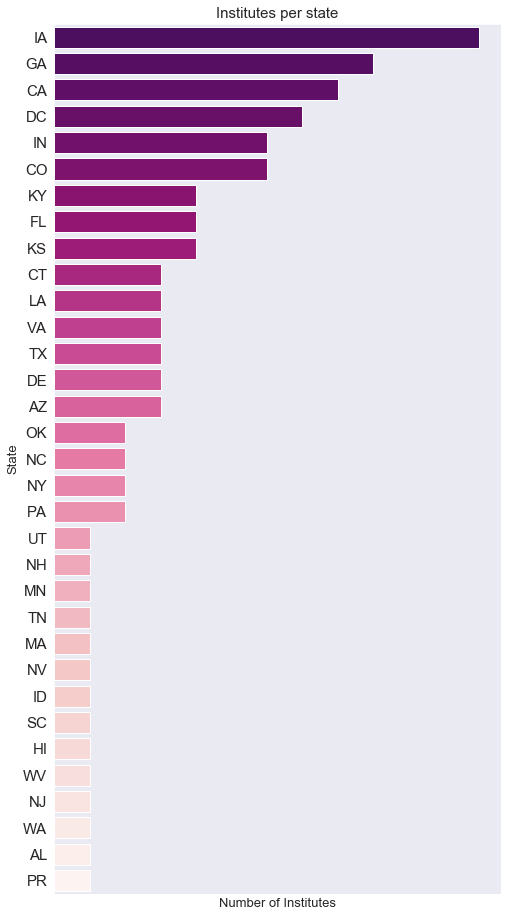

In [54]:
plt.figure(figsize = (8, 16))

# plot
ax = sb.barplot(new_data_frame.State.value_counts().values, list(new_data_frame.State.value_counts().index), 
           palette = sb.color_palette('RdPu_r', len(new_data_frame.State.value_counts())))


# plot labels
plt.title('Institutes per state', fontsize = 15)
plt.xlabel('Number of Institutes', fontsize = 13)
plt.ylabel('State', fontsize = 13)
plt.xticks([], [])
plt.yticks(fontsize = 15)

plt.show();

### JJ's Code - End

----------------------------------------------

### Ana's Code - Start

### Ana's Code - End

----------------------------------------------

### Vikash's Code - Start

### Vikash's Code - End